In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("Nigeria Analysis.xlsx")
data.head()

,Country,Years,Month,DATE,DATE.1,M1,M1 growth rate,Exchange rate,Exchange growth rate,Inflation,Inflation growth rate,Stock market,Stock growth rate
0,Nigeria,2024,1,2024-01-01,2024-January,31555882.24,-0.040520,1607.00,-0.048531,29.90,0.060201,100568.60,-0.005082
1,Nigeria,2024,2,2024-02-01,2024-February,30277249.26,0.073080,1529.01,-0.029437,31.70,0.047319,100057.49,-0.007564
2,Nigeria,2024,3,2024-03-01,2024-March,32489908.18,0.040908,1484.00,-0.064016,33.20,0.014759,99300.62,-0.010826
3,Nigeria,2024,4,2024-04-01,2024-April,33818990.81,-0.012903,1389.00,-0.061915,33.69,0.007717,98225.63,0.064509
4,Nigeria,2024,5,2024-05-01,2024-May,33382632.88,-0.373594,1303.00,0.240637,33.95,0.007069,104562.06,-0.043819


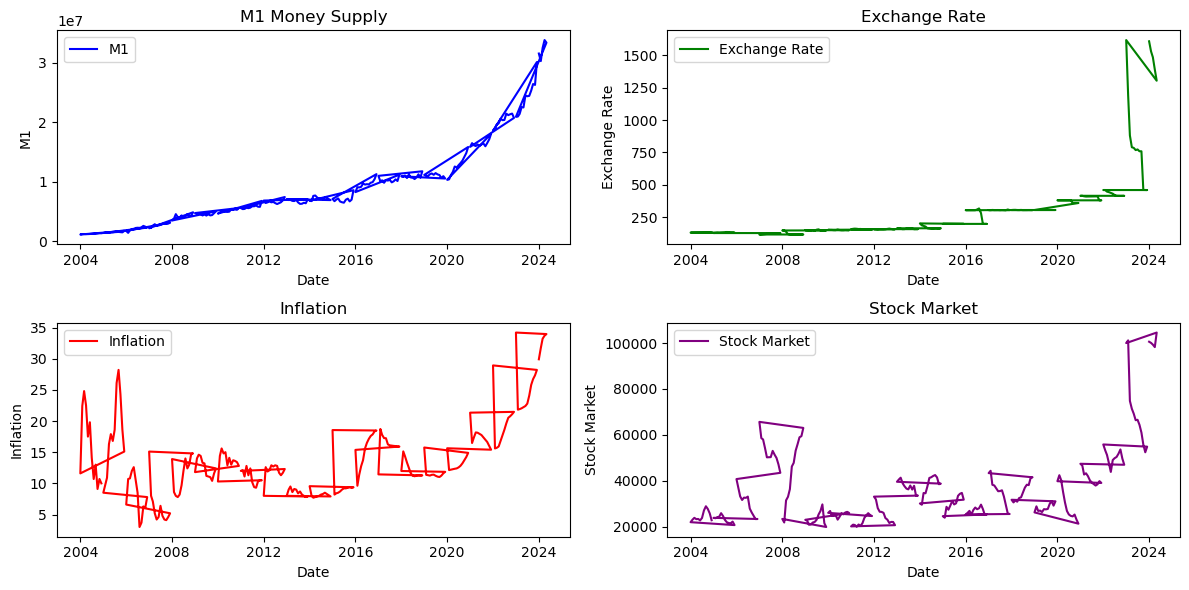

In [3]:
# Convert the 'DATE' column to datetime format for plotting
data['DATE'] = pd.to_datetime(data['DATE'])

# Plot the variables to visualize their relationships
plt.figure(figsize=(12, 6))

# Plot M1
plt.subplot(2, 2, 1)
plt.plot(data['DATE'], data['M1'], label='M1', color='blue')
plt.title('M1 Money Supply')
plt.xlabel('Date')
plt.ylabel('M1')
plt.legend()

# Plot Exchange rate
plt.subplot(2, 2, 2)
plt.plot(data['DATE'], data['Exchange rate'], label='Exchange Rate', color='green')
plt.title('Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()

# Plot Inflation
plt.subplot(2, 2, 3)
plt.plot(data['DATE'], data['Inflation'], label='Inflation', color='red')
plt.title('Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.legend()

# Plot Stock market
plt.subplot(2, 2, 4)
plt.plot(data['DATE'], data['Stock market'], label='Stock Market', color='purple')
plt.title('Stock Market')
plt.xlabel('Date')
plt.ylabel('Stock Market')
plt.legend()

plt.tight_layout()
plt.show()

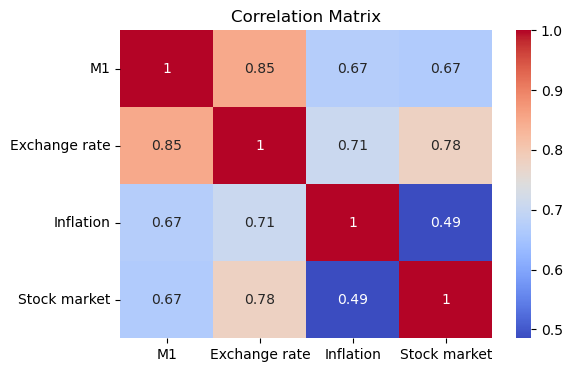

In [4]:
# Compute the correlation matrix
correlation_matrix = data[['M1', 'Exchange rate', 'Inflation', 'Stock market']].corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

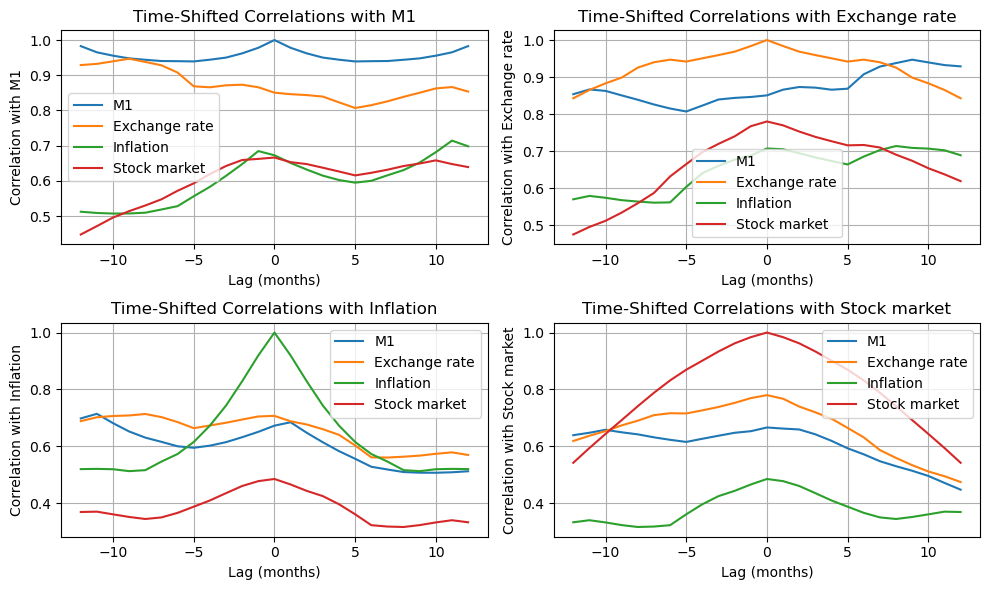

In [5]:
# Shift the variables to calculate time-lagged correlations
lags = range(-12, 13)  # from -12 to +12 months
shifted_correlations = {}

for var in ['M1', 'Exchange rate', 'Inflation', 'Stock market']:
    shifted_correlations[var] = {
        'M1': [data['M1'].shift(lag).corr(data[var]) for lag in lags],
        'Exchange rate': [data['Exchange rate'].shift(lag).corr(data[var]) for lag in lags],
        'Inflation': [data['Inflation'].shift(lag).corr(data[var]) for lag in lags],
        'Stock market': [data['Stock market'].shift(lag).corr(data[var]) for lag in lags]
    }

# Plot the time-lagged correlations
plt.figure(figsize=(10, 6))

for idx, var in enumerate(['M1', 'Exchange rate', 'Inflation', 'Stock market']):
    plt.subplot(2, 2, idx+1)
    plt.plot(lags, shifted_correlations[var]['M1'], label='M1')
    plt.plot(lags, shifted_correlations[var]['Exchange rate'], label='Exchange rate')
    plt.plot(lags, shifted_correlations[var]['Inflation'], label='Inflation')
    plt.plot(lags, shifted_correlations[var]['Stock market'], label='Stock market')
    plt.xlabel('Lag (months)')
    plt.ylabel(f'Correlation with {var}')
    plt.title(f'Time-Shifted Correlations with {var}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

0.16482922493542734


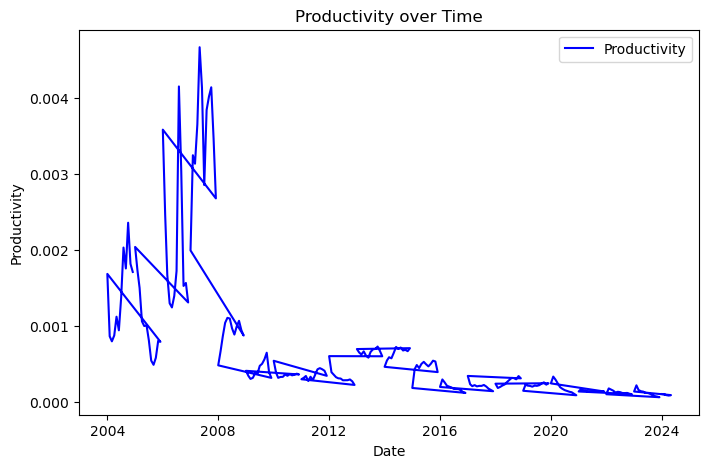

In [6]:
# Example productivity model
# Assuming productivity is a function of M1, Exchange_rate, and Stock_market
data['Productivity'] = data['Stock market'] / (data['M1'] * data['Inflation'])

print(data['Productivity'].sum())

# Plot productivity over time
plt.figure(figsize=(8, 5))
plt.plot(data['DATE'], data['Productivity'], label='Productivity', color='blue')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.title('Productivity over Time')
plt.legend()
plt.show()

Baseline Productivity: 0.001447132603101104


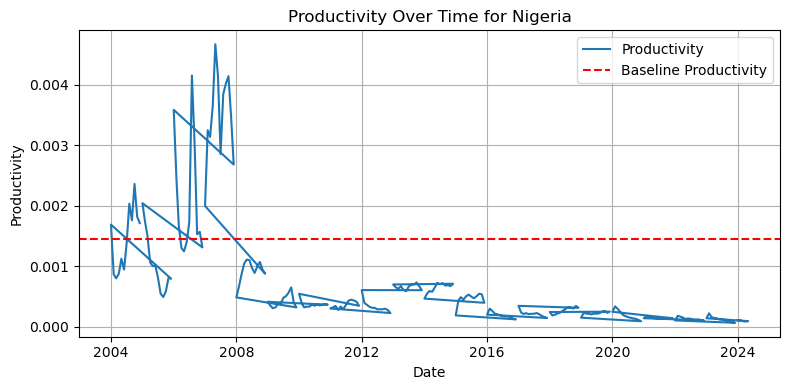

In [7]:
# Determine a stable period for baseline calculation
# Assume the first 5 years in the dataset are considered stable
stable_period = data[data['DATE'] < pd.to_datetime('2005-01-01')]

# Calculate baseline productivity
baseline_productivity = stable_period['Productivity'].mean()

print("Baseline Productivity:", baseline_productivity)

# Plot productivity over time for Nigeria
plt.figure(figsize=(8, 4))
plt.plot(data['DATE'], data['Productivity'], label='Productivity')

# Plot baseline productivity
plt.axhline(y=baseline_productivity, color='r', linestyle='--', label='Baseline Productivity')

plt.xlabel('Date')
plt.ylabel('Productivity')
plt.title('Productivity Over Time for Nigeria')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

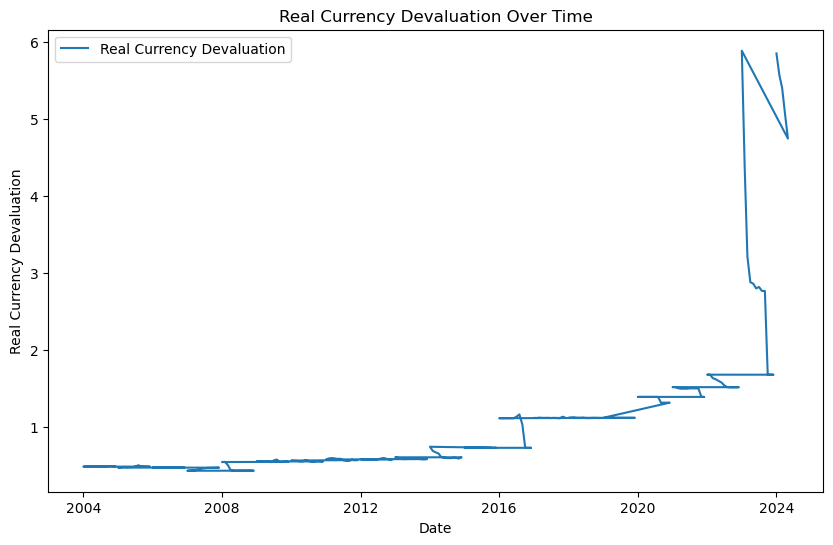

In [11]:
# Determine productivity baseline (e.g., mean productivity when M1 is flat)
# For simplicity, we'll calculate the mean productivity for the entire period as a baseline
productivity_baseline = data['Productivity'].mean()

# Calculate real currency devaluation
# Assume reference currency has flat M1 growth and stable productivity
reference_exchange_rate = data['Exchange rate'].mean()

# Calculate real currency devaluation
data['Real Currency Devaluation'] = data['Exchange rate'] / reference_exchange_rate

# Plot real currency devaluation over time
plt.figure(figsize=(10, 6))
plt.plot(data['DATE'], data['Real Currency Devaluation'], label='Real Currency Devaluation')
plt.xlabel('Date')
plt.ylabel('Real Currency Devaluation')
plt.title('Real Currency Devaluation Over Time')
plt.legend()
plt.show()